# PWS in noise simulation

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kaooi
import xrsignal
from scipy import signal
from numpy import matlib

In [2]:
Tx = kaooi.construct_replica(sampling_rate=200)

In [3]:
t = np.arange(0,60,0.005)
g = np.zeros(t.shape)
g[10*200] = 1

g = xr.DataArray(g, dims=['time'], coords={'time':t})

In [72]:
SNR = -30
noise_std = 3*(1/10**(SNR/20))
Rx = matlib.repmat(signal.convolve(g, Tx, mode='full'), 40,1)
Rxn = Rx + np.random.normal(0,noise_std,Rx.shape)
match = np.apply_along_axis(signal.correlate, 1, Rxn, in2=Tx, mode='full')
pw = np.abs(np.mean(np.exp(1j*np.angle(signal.hilbert(match))),axis=0))
pws = np.mean(match, axis=0)*(pw**2)

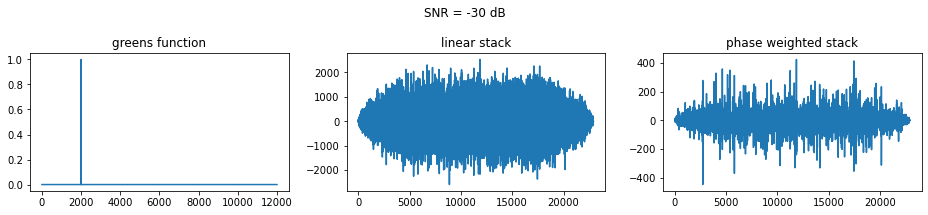

In [73]:
fig = plt.figure(figsize=(13,3))
fig.suptitle(f'SNR = {SNR} dB')
plt.subplot(1,3,1)
plt.plot(g)
plt.title('greens function')

plt.subplot(1,3,2)
plt.plot(np.mean(match, axis=0))
plt.title('linear stack')

plt.subplot(1,3,3)
plt.plot(pws)
plt.title('phase weighted stack')

plt.tight_layout()

fig.savefig(f'figures/pws_SNR{SNR}.svg')